In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('vendas_atual.xlsx')

print(df)

          data         loja         categoria          produto  quantidade  \
0   2024-07-20  Vento Norte  Eletrodomesticos        Aquecedor         5.0   
1   2024-05-30  Vento Norte           Sazonal     Guarda-Chuva         6.0   
2   2024-01-25  Vento Norte            Roupas            Calça         8.0   
3   2024-07-10  Chuva Clara            Roupas           Casaco         5.0   
4   2024-05-29    Porto Sol          Infantil   Blusa Infantil         NaN   
..         ...          ...               ...              ...         ...   
495 2024-08-23    Porto Sol  Eletrodomesticos       Ventilador         4.0   
496 2024-12-19  Vento Norte  Eletrodomesticos       Ventilador         1.0   
497 2024-05-12    Vila Neve          Infantil   Blusa Infantil         6.0   
498 2024-03-08    Vila Neve  Eletrodomesticos  Ar-Condicionado         1.0   
499 2024-07-25  Vento Norte           Sazonal     Guarda-Chuva         3.0   

     valor_venda  valor_unitário  Recalculo  
0         405.55 

<ipython-input-68-f51302c91409>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_vendido.values,


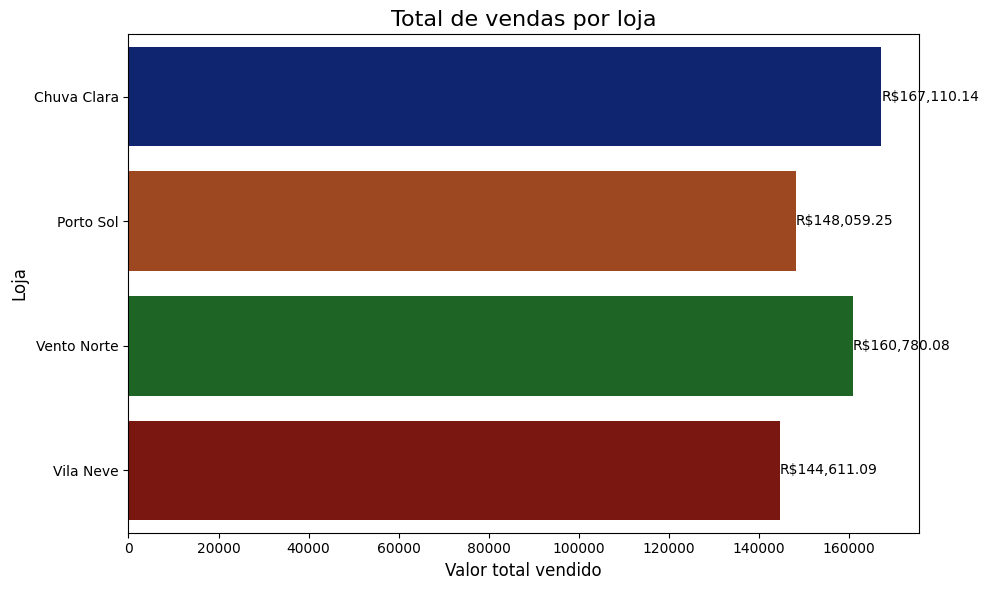

In [68]:
# 1. Total de vendas por loja - Agrupar por loja e somar o valor total vendido

total_vendido = df.groupby('loja')['valor_venda'].sum()


plt.figure(figsize=(10, 6))
sns.barplot(x=total_vendido.values,
            y=total_vendido.index,
            palette='dark')

plt.title('Total de vendas por loja', fontsize=16)
plt.xlabel('Valor total vendido', fontsize=12)
plt.ylabel('Loja', fontsize=12)

for index, value in enumerate(total_vendido.values):
    plt.text(value + 10, index, f'R${value:,.2f}', va='center')
plt.tight_layout()
plt.show()



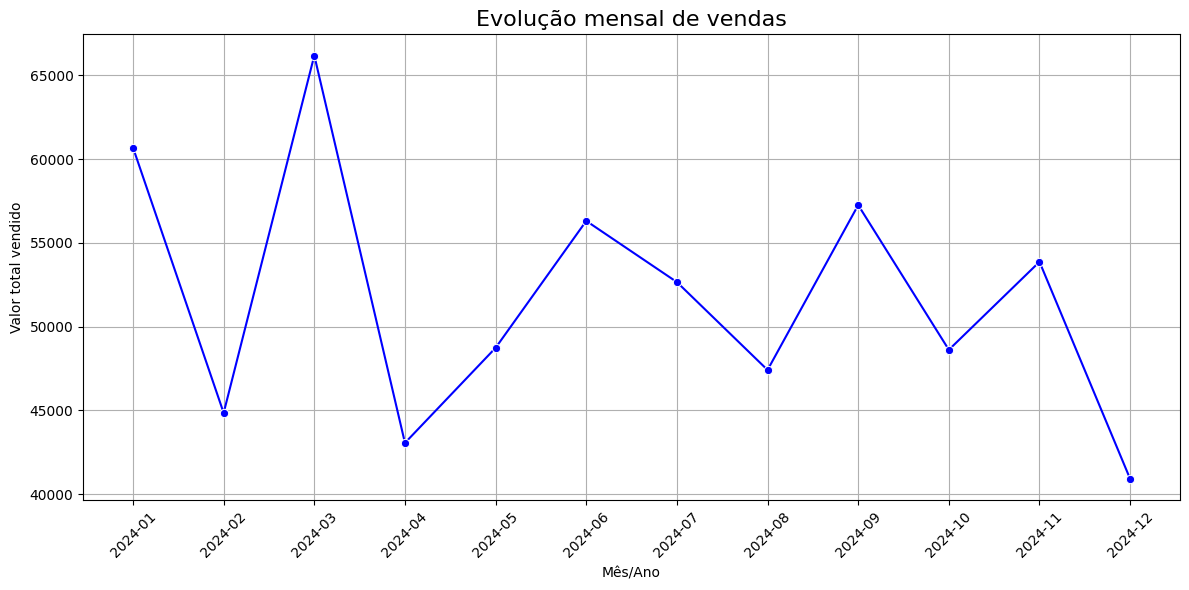

In [69]:
# 2. Evolução mensal de vendas -  Identificar sazonalidades e picos mensais.


df['data'] = pd.to_datetime(df['data'])
df['ano_mes'] = df['data'].dt.to_period('M').astype(str)
vendas_mensais = df.groupby('ano_mes')['valor_venda'].sum().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(data=vendas_mensais, x='ano_mes', y='valor_venda', marker='o', color='blue')


plt.title('Evolução mensal de vendas', fontsize=16)
plt.xlabel('Mês/Ano')
plt.ylabel('Valor total vendido')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


plt.show()


In [70]:
# 3. Agrupar por mês e somar vendas

df['data'] = pd.to_datetime(df['data'])
df['ano_mes'] = df['data'].dt.to_period('M').astype(str)
vendas_mensais = df.groupby('ano_mes')['valor_venda'].sum()

print(vendas_mensais)

ano_mes
2024-01    60691.71
2024-02    44847.58
2024-03    66190.62
2024-04    43056.45
2024-05    48735.05
2024-06    56312.80
2024-07    52659.94
2024-08    47412.70
2024-09    57258.88
2024-10    48616.57
2024-11    53871.05
2024-12    40907.21
Name: valor_venda, dtype: float64


In [ ]:
# 4. Produtos mais vendidos (por volume) Objetivo: saber o que mais sai no caixa.

mais_vendidos = df.groupby('produto')['quantidade'].sum()
print(mais_vendidos)

In [57]:
# 5. Comparação entre categorias. Objetivo: analisar quais categorias são mais lucrativas.

mais_vendidos_categoria = df.groupby('categoria')['quantidade'].sum()

print(mais_vendidos)


produto
Aquecedor          215.0
Ar-Condicionado    153.0
Blusa Infantil     181.0
Calça              163.0
Camiseta           130.0
Casaco             156.0
Guarda-Chuva       253.0
Lancheira          191.0
Manta Térmica      215.0
Mochila            192.0
Protetor Solar     260.0
Ventilador         165.0
Vestido            148.0
Name: quantidade, dtype: float64


In [71]:
# 6. Comparação entre lojas por categoria. Objetivo: avaliar se há especialização ou foco
# diferente entre as lojas, com base nas categorias que mais vendem.

mais_vendidos_categoria = df.groupby(['categoria','loja'])['quantidade'].sum()
print(mais_vendidos_categoria)

categoria         loja       
Eletrodomesticos  Chuva Clara    122.0
                  Porto Sol      118.0
                  Vento Norte    157.0
                  Vila Neve      149.0
Infantil          Chuva Clara    130.0
                  Porto Sol      137.0
                  Vento Norte    141.0
                  Vila Neve      182.0
Roupas            Chuva Clara    214.0
                  Porto Sol      137.0
                  Vento Norte    179.0
                  Vila Neve       92.0
Sazonal           Chuva Clara    198.0
                  Porto Sol      197.0
                  Vento Norte    160.0
                  Vila Neve      182.0
Name: quantidade, dtype: float64


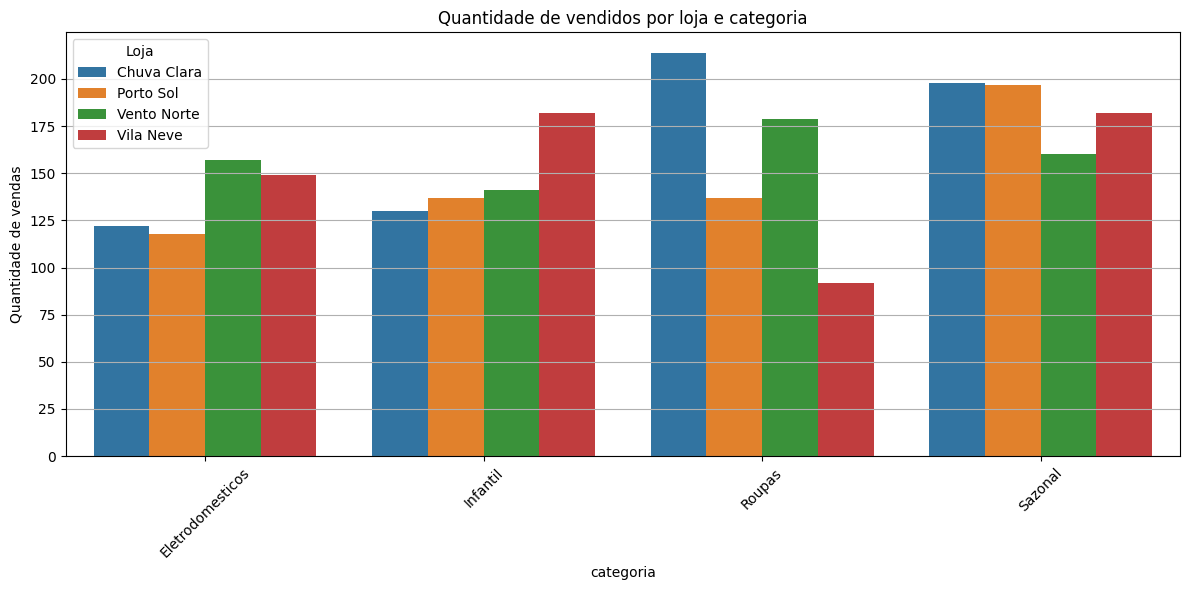

In [75]:
# 7. Plotar como gráfico de barras empilhadas
mais_vendidos_categoria = df.groupby(['categoria', 'loja'])['quantidade'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=mais_vendidos_categoria, x='categoria', y='quantidade', hue='loja')

plt.title('Quantidade de vendidos por loja e categoria')
plt.xlabel('categoria')
plt.ylabel('Quantidade de vendas')
plt.xticks(rotation=45)
plt.legend(title='Loja')
plt.tight_layout()
plt.grid(axis='y')
plt.show()
